In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

In [2]:
df =  pd.read_csv('raw_data.csv')
df.columns =["start", "total", 'overhead', 'duration']
df.head()

,start,total,overhead,duration
0,197,200,2.175905,229
1,199,200,1.781835,372
2,199,200,1.035544,109
3,199,200,1.117505,65
4,198,200,1.502414,343


In [3]:
df.shape

(26555, 4)

## Creating new column to filter the change of the number of cars on

In [4]:
df['c'] = df['total'].diff()
df_filtered = df[df['c'] != 0]
df_filtered

,start,total,overhead,duration,c
0,197,200,2.175905,229,NaN
1357,294,300,2.489857,56,100.0
2523,387,400,1.352314,81,100.0
3939,498,500,1.194267,71,100.0
5654,594,600,1.208732,27,100.0
9354,496,500,2.590197,136,-100.0
11033,396,400,1.205801,19,-100.0
12481,296,300,1.528362,117,-100.0
13679,197,200,1.512477,73,-100.0
15303,298,300,1.277110,140,100.0


In [5]:
index_list = df_filtered.index.tolist() # list of the start poisitions of index for change of values 
print(len(index_list))
print(index_list)

17
[0, 1357, 2523, 3939, 5654, 9354, 11033, 12481, 13679, 15303, 16368, 17717, 19215, 22552, 24058, 25407, 26521]


In [6]:
l_mod = index_list + [max(index_list)+1] # creating a list of indexes to iterate over (must have 0 in it)
list_of_dfs = [df.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)] # creating a list of dfs for each index

In [7]:
df2, df3, df4,df5,df6 = [], [], [], [],[] # creating new arrays for separate car numbers

In [8]:
for i in list_of_dfs:
    x = i['overhead'].tolist()
    if 200 == i['total'].iloc[0]:
        df2.append(x)
    elif 300 == i['total'].iloc[0]:
        df3.append(x)
    elif 400 == i['total'].iloc[0]:
        df4.append(x)
    elif 500 == i['total'].iloc[0]:
        df5.append(x)
    elif 600 == i['total'].iloc[0]:
        df6.append(x)

In [17]:
len(df6)

2

In [18]:
A = [df2[0], df2[1]]
B = [df3[0], df3[1], df3[2], df3[3]]
C = [df4[0], df4[1], df4[2], df4[3]]
D = [df5[0], df5[1], df5[2], df5[3]]
E = [df6[0], df6[1]]

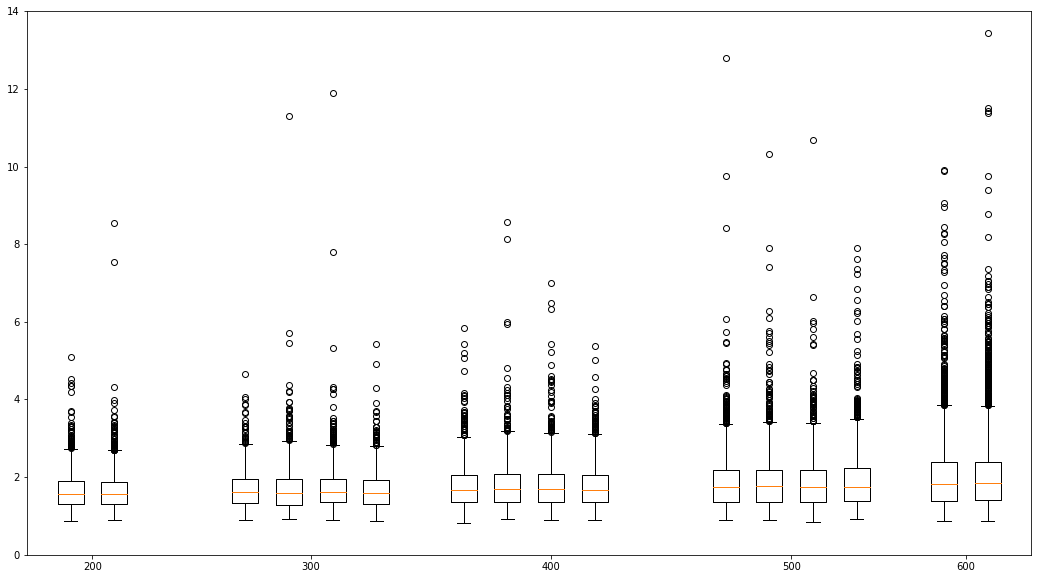

In [20]:
fig = figure(figsize=(18, 10))
ax = axes()
# hold(True)

bp = boxplot(A, positions = [1, 2], widths = 0.6)

bp = boxplot(B, positions = [5, 6, 7, 8], widths = 0.6)

bp = boxplot(C, positions = [10, 11,12,13], widths = 0.6)

bp = boxplot(D, positions = [16,17,18,19], widths = 0.6)

bp = boxplot(E, positions = [21, 22], widths = 0.6)


# set axes limits and labels
xlim(0,23)
ylim(0,14)
ax.set_xticklabels(['200', '300', '400', '500', '600'])
ax.set_xticks([1.5, 6.5, 12, 17.5, 21.5])

# draw temporary red and blue lines and use them to create a legend
# hB, = plot([1,1],'b-')
# hR, = plot([1,1],'r-')
# legend((hB, hR),('Apples', 'Oranges'))
# hB.set_visible(False)
# hR.set_visible(False)

savefig('boxcompare.png')
show()